In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('beer_reviews.csv')
df = df.iloc[:,1:]
df.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [4]:
df.shape

(1586614, 13)

# Data Preprocessing

In [5]:
#brewery_name, review_profilename, and beer_abv don't match the shape
df.info('include all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1518829 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [6]:
df[df['beer_abv'].isna()]

brewery_id                 brewery_name  review_time  review_overall  \
273            1075      Caldera Brewing Company   1103668195             3.0   
430             850   Moon River Brewing Company   1110736110             3.5   
603             850   Moon River Brewing Company   1100038819             4.0   
733            1075      Caldera Brewing Company   1260673921             4.0   
798            1075      Caldera Brewing Company   1212201268             4.5   
...             ...                          ...          ...             ...   
1586568       14359  The Defiant Brewing Company   1187052567             4.0   
1586587       14359  The Defiant Brewing Company   1177842168             3.5   
1586596       14359  The Defiant Brewing Company   1287951067             4.0   
1586597       14359  The Defiant Brewing Company   1241906223             4.5   
1586598       14359  The Defiant Brewing Company   1236550020             4.0   

         review_aroma  review_appearance review_profilename  \
273               3.0                3.0         RedDiamond   
430               4.0                4.5            cMonkey   
603               3.5                4.0           aracauna   
733               4.0                4.0            plaid75   
798               4.5                4.0             grumpy   
...               ...                ...                ...   
1586568           3.5                4.0         maddogruss   
1586587           4.5                4.0                BBM   
1586596           3.0                5.0         hoppymcgee   
1586597           4.5                4.0             WesWes   
1586598           4.0                3.5          Slatetank   

                               beer_style  review_palate  review_taste  \
273                        American Stout            4.0           3.0   
430                Scotch Ale / Wee Heavy            3.5           3.5   
603                Scotch Ale / Wee Heavy            3.5           3.5   
733                          American IPA            4.0           4.0   
798      American Double / Imperial Stout            4.0           4.5   
...                                   ...            ...           ...   
1586568                              Bock            4.0           4.0   
1586587             Maibock / Helles Bock            4.5           4.0   
1586596           Belgian Strong Pale Ale            4.0           3.5   
1586597           Belgian Strong Pale Ale            4.0           4.0   
1586598           Belgian Strong Pale Ale            4.0           4.5   

                       beer_name  beer_abv  beer_beerid  
273      Cauldron Espresso Stout       NaN        21241  
430         The Highland Stagger       NaN        20689  
603         The Highland Stagger       NaN        20689  
733                   Alpha Beta       NaN        54723  
798               Imperial Stout       NaN        42964  
...                          ...       ...          ...  
1586568                     Bock       NaN        36424  
1586587                  Maibock       NaN        36555  
1586596            Resolution #2       NaN        48360  
1586597            Resolution #2       NaN        48360  
1586598            Resolution #2       NaN        48360  

[67785 rows x 13 columns]

In [7]:
med = df.groupby('beer_style')['beer_abv'].transform('median')
med

0          5.2
1          7.0
2          7.6
3          5.0
4          9.0
          ... 
1586609    6.0
1586610    6.0
1586611    6.0
1586612    6.0
1586613    6.0
Name: beer_abv, Length: 1586614, dtype: float64

In [8]:
#replace NaN values with the beer_style average
df['beer_abv'] = df['beer_abv'].fillna(med)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586614 non-null  int64  
 1   brewery_name        1586599 non-null  object 
 2   review_time         1586614 non-null  int64  
 3   review_overall      1586614 non-null  float64
 4   review_aroma        1586614 non-null  float64
 5   review_appearance   1586614 non-null  float64
 6   review_profilename  1586266 non-null  object 
 7   beer_style          1586614 non-null  object 
 8   review_palate       1586614 non-null  float64
 9   review_taste        1586614 non-null  float64
 10  beer_name           1586614 non-null  object 
 11  beer_abv            1586614 non-null  float64
 12  beer_beerid         1586614 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [9]:
#keep data without NAs => only consists of .02% of data
df = df[df['brewery_name'].notna()]
df = df[df['review_profilename'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586251 non-null  int64  
 1   brewery_name        1586251 non-null  object 
 2   review_time         1586251 non-null  int64  
 3   review_overall      1586251 non-null  float64
 4   review_aroma        1586251 non-null  float64
 5   review_appearance   1586251 non-null  float64
 6   review_profilename  1586251 non-null  object 
 7   beer_style          1586251 non-null  object 
 8   review_palate       1586251 non-null  float64
 9   review_taste        1586251 non-null  float64
 10  beer_name           1586251 non-null  object 
 11  beer_abv            1586251 non-null  float64
 12  beer_beerid         1586251 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.4+ MB


In [10]:
#check rating values and counts
sorted(df['review_overall'].unique())

[0.0, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]

In [11]:
#zero is not a valid rating, only 7 entries
df['review_overall'].value_counts()

4.0    582683
4.5    324321
3.5    301743
3.0    165582
5.0     91298
2.5     58485
2.0     38206
1.5     12972
1.0     10954
0.0         7
Name: review_overall, dtype: int64

In [12]:
#instances where overall review = 0
df[df['review_overall']==0]

brewery_id              brewery_name  review_time  review_overall  \
37234         1413       Desert Edge Brewery   1030197670             0.0   
39648         1413       Desert Edge Brewery   1030267158             0.0   
39667         1413       Desert Edge Brewery   1030266889             0.0   
653695        1412  Red Rock Brewing Company   1030007859             0.0   
653706        1412  Red Rock Brewing Company   1030008142             0.0   
653726        1412  Red Rock Brewing Company   1030007737             0.0   
653740        1412  Red Rock Brewing Company   1030008039             0.0   

        review_aroma  review_appearance review_profilename  \
37234            2.0                0.0           beernut7   
39648            4.0                0.0           beernut7   
39667            3.0                0.0           beernut7   
653695           2.0                0.0           beernut7   
653706           3.0                0.0           beernut7   
653726           2.0                0.0           beernut7   
653740           2.0                0.0           beernut7   

                      beer_style  review_palate  review_taste  \
37234             Czech Pilsener            3.0           2.0   
39648            Irish Dry Stout            2.0           2.0   
39667    American Pale Ale (APA)            2.0           2.0   
653695                Hefeweizen            2.5           2.0   
653706  American Amber / Red Ale            2.5           3.5   
653726           German Pilsener            3.0           1.5   
653740              Dunkelweizen            2.5           2.0   

                      beer_name  beer_abv  beer_beerid  
37234                  Pub Pils       4.0         3806  
39648         Latter Days Stout       4.0         3804  
39667             Utah Pale Ale       4.0         3810  
653695  Red Rock Bavarian Weiss       4.0         3788  
653706       Red Rock Amber Ale       4.0         3787  
653726         Red Rock Pilsner       4.0         3822  
653740   Red Rock Dunkel Weizen       4.0         3786

In [13]:
#ignore these values as well => only 7 entries
df = df[df['review_overall']!=0]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586244 entries, 0 to 1586613
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   brewery_id          1586244 non-null  int64  
 1   brewery_name        1586244 non-null  object 
 2   review_time         1586244 non-null  int64  
 3   review_overall      1586244 non-null  float64
 4   review_aroma        1586244 non-null  float64
 5   review_appearance   1586244 non-null  float64
 6   review_profilename  1586244 non-null  object 
 7   beer_style          1586244 non-null  object 
 8   review_palate       1586244 non-null  float64
 9   review_taste        1586244 non-null  float64
 10  beer_name           1586244 non-null  object 
 11  beer_abv            1586244 non-null  float64
 12  beer_beerid         1586244 non-null  int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 169.4+ MB


# Data Exploration

<AxesSubplot:title={'center':'Histogram - Beer Abv'}, ylabel='Frequency'>

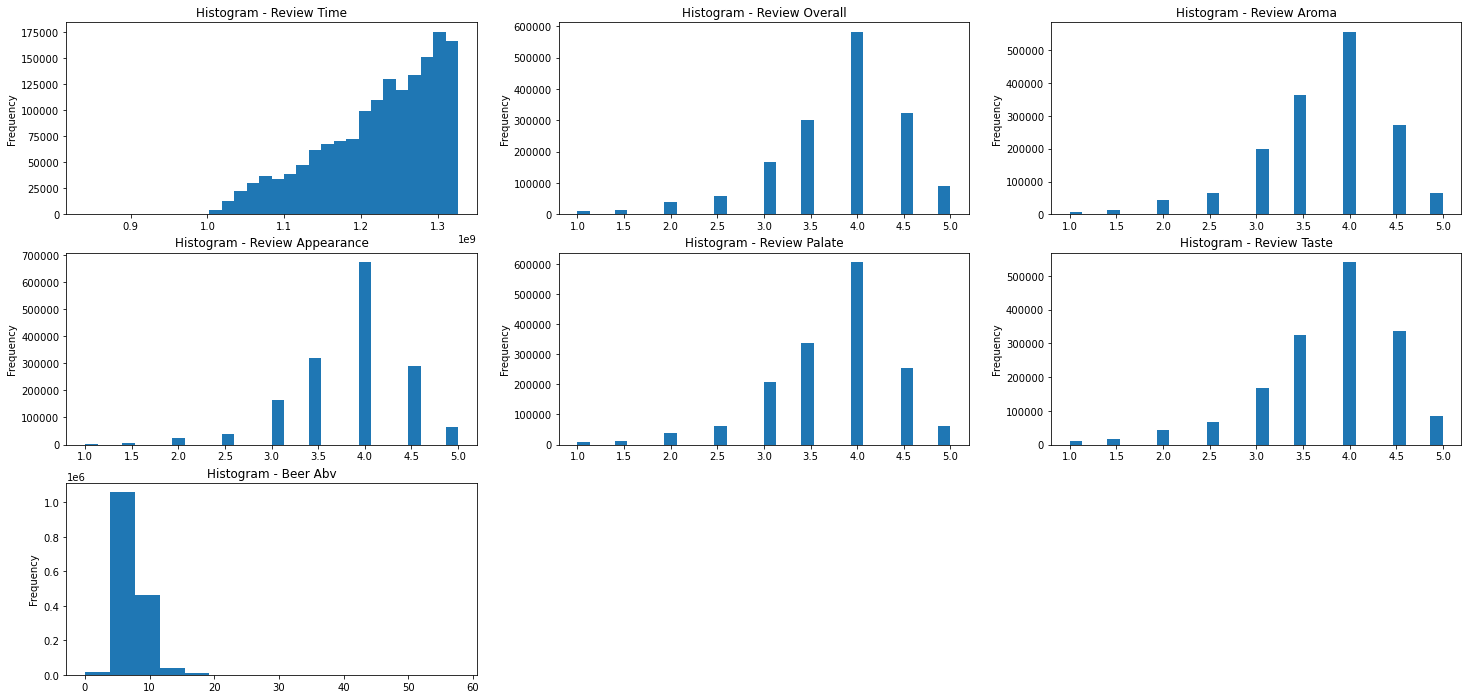

In [15]:
#distribution of numerical variables
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(331)
ax1.set_title('Histogram - Review Time')
df["review_time"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(332)
ax1.set_title('Histogram - Review Overall')
df["review_overall"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(333)
ax1.set_title('Histogram - Review Aroma')
df["review_aroma"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(334)
ax1.set_title('Histogram - Review Appearance')
df["review_appearance"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(335)
ax1.set_title('Histogram - Review Palate')
df["review_palate"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(336)
ax1.set_title('Histogram - Review Taste')
df["review_taste"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(337)
ax1.set_title('Histogram - Beer Abv')
df["beer_abv"].plot(kind="hist", bins=15)

In [16]:
#correlation matrix => numerical data
df_nums = df[['review_time','review_overall','review_aroma','review_appearance','review_palate','review_taste','beer_abv']]
corr = df_nums.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [17]:
df_cats = pd.DataFrame(df[['brewery_name','review_profilename','beer_style','beer_name']])
df_cats.head()

brewery_name review_profilename                      beer_style  \
0          Vecchio Birraio            stcules                      Hefeweizen   
1          Vecchio Birraio            stcules              English Strong Ale   
2          Vecchio Birraio            stcules          Foreign / Export Stout   
3          Vecchio Birraio            stcules                 German Pilsener   
4  Caldera Brewing Company     johnmichaelsen  American Double / Imperial IPA   

                beer_name  
0            Sausa Weizen  
1                Red Moon  
2  Black Horse Black Beer  
3              Sausa Pils  
4           Cauldron DIPA

In [18]:
cat_cts = pd.DataFrame([[len(df['brewery_name'].value_counts()),
                             len(df['review_profilename'].value_counts()),
                             len(df['beer_style'].value_counts()),
                        len(df['beer_name'].value_counts())]], columns=df_cats.columns)
cat_cts.head()

brewery_name  review_profilename  beer_style  beer_name
0          5742               33387         104      56847

   brewery_name  review_profilename  beer_style  beer_name
0          5742               33387         104      56847


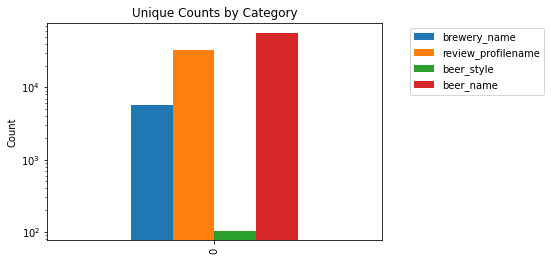

In [19]:
#graph unique vals
cat_cts.plot(kind="bar",title="Unique Counts by Category", ylabel="Count", logy=True).legend(bbox_to_anchor=(1.5, 1))
print(cat_cts)

In [20]:
beer_style_df = pd.DataFrame(df['beer_style'].value_counts())
beer_style_df.head()

beer_style
American IPA                          117566
American Double / Imperial IPA         85958
American Pale Ale (APA)                63459
Russian Imperial Stout                 54120
American Double / Imperial Stout       50696

# Transformation - Review Counts Dataframe

In [21]:
df.head()

brewery_id             brewery_name  review_time  review_overall  \
0       10325          Vecchio Birraio   1234817823             1.5   
1       10325          Vecchio Birraio   1235915097             3.0   
2       10325          Vecchio Birraio   1235916604             3.0   
3       10325          Vecchio Birraio   1234725145             3.0   
4        1075  Caldera Brewing Company   1293735206             4.0   

   review_aroma  review_appearance review_profilename  \
0           2.0                2.5            stcules   
1           2.5                3.0            stcules   
2           2.5                3.0            stcules   
3           3.0                3.5            stcules   
4           4.5                4.0     johnmichaelsen   

                       beer_style  review_palate  review_taste  \
0                      Hefeweizen            1.5           1.5   
1              English Strong Ale            3.0           3.0   
2          Foreign / Export Stout            3.0           3.0   
3                 German Pilsener            2.5           3.0   
4  American Double / Imperial IPA            4.0           4.5   

                beer_name  beer_abv  beer_beerid  
0            Sausa Weizen       5.0        47986  
1                Red Moon       6.2        48213  
2  Black Horse Black Beer       6.5        48215  
3              Sausa Pils       5.0        47969  
4           Cauldron DIPA       7.7        64883

In [22]:
#average reviews by beer df
df_avgrev = df.groupby(['beer_beerid'], as_index=False)[['review_overall','review_aroma',
                                                                       'review_appearance','review_palate','review_taste',
                                                                       'beer_abv']].mean()


In [23]:
df_avgrev.head()

beer_beerid  review_overall  review_aroma  review_appearance  \
0            3        4.166667      4.000000           3.833333   
1            4        3.700000      3.800000           3.950000   
2            5        3.549528      3.205189           3.485849   
3            6        3.706956      3.515964           3.836374   
4            7        3.266313      3.179059           3.251138   

   review_palate  review_taste  beer_abv  
0       4.166667      4.166667       6.7  
1       3.700000      3.450000       6.0  
2       3.318396      3.340802       4.5  
3       3.513113      3.645382       5.6  
4       3.106980      3.101669       4.2

In [24]:
df_avgrev.columns = ['beer_beerid','avgrev_overall','avgrev_aroma',
                        'avgrev_appearance','avgrev_palate','avgrev_taste','beer_abv']
df_avgrev.head()

beer_beerid  avgrev_overall  avgrev_aroma  avgrev_appearance  \
0            3        4.166667      4.000000           3.833333   
1            4        3.700000      3.800000           3.950000   
2            5        3.549528      3.205189           3.485849   
3            6        3.706956      3.515964           3.836374   
4            7        3.266313      3.179059           3.251138   

   avgrev_palate  avgrev_taste  beer_abv  
0       4.166667      4.166667       6.7  
1       3.700000      3.450000       6.0  
2       3.318396      3.340802       4.5  
3       3.513113      3.645382       5.6  
4       3.106980      3.101669       4.2

In [25]:
#add pertinent categoricals (can't add user since we are aggregating user scores)
df_cat = df.groupby(['beer_beerid'],as_index = False)[['brewery_name','beer_style','review_time']].min()
df_cat.head()

beer_beerid                 brewery_name              beer_style  \
0            3  Yellow Rose Brewing Company            American IPA   
1            4  Yellow Rose Brewing Company          American Stout   
2            5            Abita Brewing Co.            Vienna Lager   
3            6            Abita Brewing Co.       English Brown Ale   
4            7            Abita Brewing Co.  Fruit / Vegetable Beer   

   review_time  
0   1019075828  
1   1018003530  
2    994613800  
3    983533943  
4   1003490145

In [26]:
#merge categoricals with df_avgrev
df_transform = pd.merge(df_avgrev, df_cat, on='beer_beerid', how="inner")
df_transform.rename(columns={'review_time':'firstrev_time'}, inplace=True)
df_transform.head()

beer_beerid  avgrev_overall  avgrev_aroma  avgrev_appearance  \
0            3        4.166667      4.000000           3.833333   
1            4        3.700000      3.800000           3.950000   
2            5        3.549528      3.205189           3.485849   
3            6        3.706956      3.515964           3.836374   
4            7        3.266313      3.179059           3.251138   

   avgrev_palate  avgrev_taste  beer_abv                 brewery_name  \
0       4.166667      4.166667       6.7  Yellow Rose Brewing Company   
1       3.700000      3.450000       6.0  Yellow Rose Brewing Company   
2       3.318396      3.340802       4.5            Abita Brewing Co.   
3       3.513113      3.645382       5.6            Abita Brewing Co.   
4       3.106980      3.101669       4.2            Abita Brewing Co.   

               beer_style  firstrev_time  
0            American IPA     1019075828  
1          American Stout     1018003530  
2            Vienna Lager      994613800  
3       English Brown Ale      983533943  
4  Fruit / Vegetable Beer     1003490145

In [27]:
#count number of reviews, merge to new df
df_ctrev = df.groupby(['beer_beerid'], as_index=False)['review_overall'].count()
df_ctrev.head()

beer_beerid  review_overall
0            3               3
1            4              10
2            5             424
3            6             877
4            7             659

In [28]:
#merge tables, update col names
df_transform = pd.merge(df_transform,df_ctrev, on='beer_beerid',how="inner")
df_transform.rename(columns={'review_overall':'ctrev'}, inplace=True)
df_transform.head()

beer_beerid  avgrev_overall  avgrev_aroma  avgrev_appearance  \
0            3        4.166667      4.000000           3.833333   
1            4        3.700000      3.800000           3.950000   
2            5        3.549528      3.205189           3.485849   
3            6        3.706956      3.515964           3.836374   
4            7        3.266313      3.179059           3.251138   

   avgrev_palate  avgrev_taste  beer_abv                 brewery_name  \
0       4.166667      4.166667       6.7  Yellow Rose Brewing Company   
1       3.700000      3.450000       6.0  Yellow Rose Brewing Company   
2       3.318396      3.340802       4.5            Abita Brewing Co.   
3       3.513113      3.645382       5.6            Abita Brewing Co.   
4       3.106980      3.101669       4.2            Abita Brewing Co.   

               beer_style  firstrev_time  ctrev  
0            American IPA     1019075828      3  
1          American Stout     1018003530     10  
2            Vienna Lager      994613800    424  
3       English Brown Ale      983533943    877  
4  Fruit / Vegetable Beer     1003490145    659

<AxesSubplot:title={'center':'Histogram - Count of Reviews'}, ylabel='Frequency'>

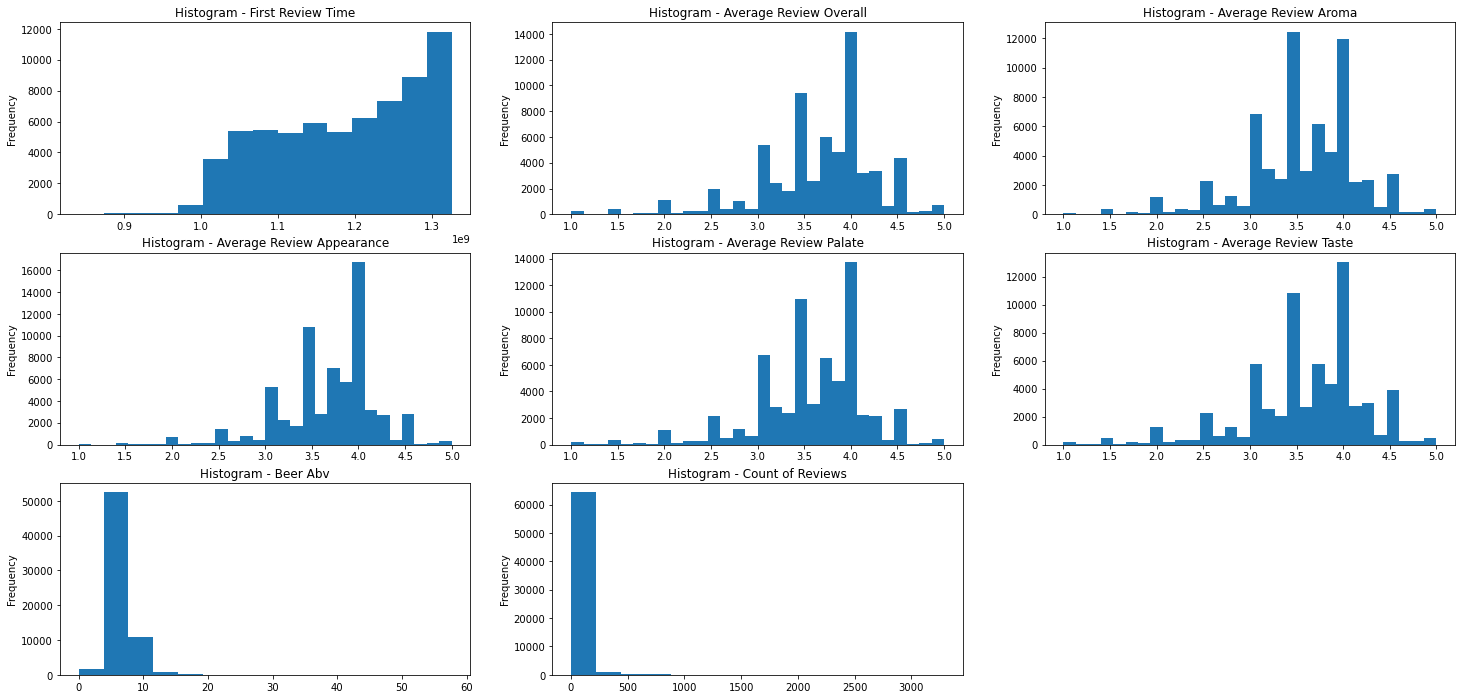

In [30]:
#distribution of numerical variables
fig = plt.figure(figsize=(25,12))
ax1 = fig.add_subplot(331)
ax1.set_title('Histogram - First Review Time')
df_transform["firstrev_time"].plot(kind="hist", bins=15)

ax1 = fig.add_subplot(332)
ax1.set_title('Histogram - Average Review Overall')
df_transform["avgrev_overall"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(333)
ax1.set_title('Histogram - Average Review Aroma')
df_transform["avgrev_aroma"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(334)
ax1.set_title('Histogram - Average Review Appearance')
df_transform["avgrev_appearance"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(335)
ax1.set_title('Histogram - Average Review Palate')
df_transform["avgrev_palate"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(336)
ax1.set_title('Histogram - Average Review Taste')
df_transform["avgrev_taste"].plot(kind="hist", bins=30)

ax1 = fig.add_subplot(337)
ax1.set_title('Histogram - Beer Abv')
df_transform["beer_abv"].plot(kind="hist", bins=15)

ax1 = fig.add_subplot(338)
ax1.set_title('Histogram - Count of Reviews')
df_transform["ctrev"].plot(kind="hist", bins=15)

In [31]:
#divide target from data
X = pd.DataFrame(np.array(df_transform)[:,1:10],columns=df_transform.columns[1:-1])
X.head()

avgrev_overall avgrev_aroma avgrev_appearance avgrev_palate avgrev_taste  \
0        4.16667            4           3.83333       4.16667      4.16667   
1            3.7          3.8              3.95           3.7         3.45   
2        3.54953      3.20519           3.48585        3.3184       3.3408   
3        3.70696      3.51596           3.83637       3.51311      3.64538   
4        3.26631      3.17906           3.25114       3.10698      3.10167   

  beer_abv                 brewery_name              beer_style firstrev_time  
0      6.7  Yellow Rose Brewing Company            American IPA    1019075828  
1        6  Yellow Rose Brewing Company          American Stout    1018003530  
2      4.5            Abita Brewing Co.            Vienna Lager     994613800  
3      5.6            Abita Brewing Co.       English Brown Ale     983533943  
4      4.2            Abita Brewing Co.  Fruit / Vegetable Beer    1003490145

In [32]:
y = pd.DataFrame(df_transform['ctrev'])
y.head()

ctrev
0      3
1     10
2    424
3    877
4    659

# Unsupervised Learning - Cluster Analysis w/ PCA

In [33]:
#normalize data matrix, turn categoricals into dummies
X.shape

(66040, 9)

In [34]:
#get dummies for categoricals
X_dum = pd.get_dummies(X, columns=['beer_style'])
X_dum.head()

avgrev_overall avgrev_aroma avgrev_appearance avgrev_palate avgrev_taste  \
0        4.16667            4           3.83333       4.16667      4.16667   
1            3.7          3.8              3.95           3.7         3.45   
2        3.54953      3.20519           3.48585        3.3184       3.3408   
3        3.70696      3.51596           3.83637       3.51311      3.64538   
4        3.26631      3.17906           3.25114       3.10698      3.10167   

  beer_abv                 brewery_name firstrev_time  beer_style_Altbier  \
0      6.7  Yellow Rose Brewing Company    1019075828                   0   
1        6  Yellow Rose Brewing Company    1018003530                   0   
2      4.5            Abita Brewing Co.     994613800                   0   
3      5.6            Abita Brewing Co.     983533943                   0   
4      4.2            Abita Brewing Co.    1003490145                   0   

   beer_style_American Adjunct Lager  ...  beer_style_Scotch Ale / Wee Heavy  \
0                                  0  ...                                  0   
1                                  0  ...                                  0   
2                                  0  ...                                  0   
3                                  0  ...                                  0   
4                                  0  ...                                  0   

   beer_style_Scottish Ale  beer_style_Scottish Gruit / Ancient Herbed Ale  \
0                        0                                               0   
1                        0                                               0   
2                        0                                               0   
3                        0                                               0   
4                        0                                               0   

   beer_style_Smoked Beer  beer_style_Tripel  beer_style_Vienna Lager  \
0                       0                  0                        0   
1                       0                  0                        0   
2                       0                  0                        1   
3                       0                  0                        0   
4                       0                  0                        0   

   beer_style_Weizenbock  beer_style_Wheatwine  beer_style_Winter Warmer  \
0                      0                     0                         0   
1                      0                     0                         0   
2                      0                     0                         0   
3                      0                     0                         0   
4                      0                     0                         0   

   beer_style_Witbier  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 112 columns]

In [35]:
#drop brewery_name => computationally too much
X_dum.drop('brewery_name',axis=1,inplace=True)

In [36]:
X_dum.shape

(66040, 111)

In [55]:
#min-max norm, scale to range of 0-1
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler().fit(X_dum)

X_norm = min_max_scaler.transform(X_dum)
X_norm = pd.DataFrame(X_norm, columns=X_dum.columns, index=X_dum.index)
X_norm.head()

avgrev_overall  avgrev_aroma  avgrev_appearance  avgrev_palate  \
0        0.791667      0.750000           0.708333       0.791667   
1        0.675000      0.700000           0.737500       0.675000   
2        0.637382      0.551297           0.621462       0.579599   
3        0.676739      0.628991           0.709094       0.628278   
4        0.566578      0.544765           0.562785       0.526745   

   avgrev_taste  beer_abv  firstrev_time  beer_style_Altbier  \
0      0.791667  0.115965       0.367403                 0.0   
1      0.612500  0.103831       0.365195                 0.0   
2      0.585200  0.077830       0.317026                 0.0   
3      0.661345  0.096897       0.294209                 0.0   
4      0.525417  0.072630       0.335306                 0.0   

   beer_style_American Adjunct Lager  beer_style_American Amber / Red Ale  \
0                                0.0                                  0.0   
1                                0.0                                  0.0   
2                                0.0                                  0.0   
3                                0.0                                  0.0   
4                                0.0                                  0.0   

   ...  beer_style_Scotch Ale / Wee Heavy  beer_style_Scottish Ale  \
0  ...                                0.0                      0.0   
1  ...                                0.0                      0.0   
2  ...                                0.0                      0.0   
3  ...                                0.0                      0.0   
4  ...                                0.0                      0.0   

   beer_style_Scottish Gruit / Ancient Herbed Ale  beer_style_Smoked Beer  \
0                                             0.0                     0.0   
1                                             0.0                     0.0   
2                                             0.0                     0.0   
3                                             0.0                     0.0   
4                                             0.0                     0.0   

   beer_style_Tripel  beer_style_Vienna Lager  beer_style_Weizenbock  \
0                0.0                      0.0                    0.0   
1                0.0                      0.0                    0.0   
2                0.0                      1.0                    0.0   
3                0.0                      0.0                    0.0   
4                0.0                      0.0                    0.0   

   beer_style_Wheatwine  beer_style_Winter Warmer  beer_style_Witbier  
0                   0.0                       0.0                 0.0  
1                   0.0                       0.0                 0.0  
2                   0.0                       0.0                 0.0  
3                   0.0                       0.0                 0.0  
4                   0.0                       0.0                 0.0  

[5 rows x 111 columns]

In [38]:
#dimensionality reduction => PCA
from sklearn import decomposition

In [39]:
#create pca, fit to df_norm
pca = decomposition.PCA()
X_pca = pca.fit_transform(X_norm)

In [40]:
np.set_printoptions(suppress=True, precision=2, linewidth=120)
print(pca.explained_variance_ratio_)

[0.08 0.05 0.04 0.04 0.03 0.03 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.02 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01
 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]


In [41]:
#78 dimensions capture 95% of the data, reduces data by 23 dimensions
res = 0
for i in enumerate(pca.explained_variance_ratio_):
    res += i[1]
    print(i[0]+1,res)
        

1 0.08162712299026299
2 0.12865336273308603
3 0.17131353257331425
4 0.20655062644717695
5 0.2393904812487527
6 0.2679939699476679
7 0.292240463945266
8 0.3149106475770202
9 0.3353264123414203
10 0.35508515790004713
11 0.3741189554251767
12 0.39299856852729004
13 0.41102571830667334
14 0.42809458618806384
15 0.4449542815225267
16 0.4612862015576696
17 0.47699907690939947
18 0.492267259347404
19 0.5072960453132956
20 0.5219066575819397
21 0.5361851364379092
22 0.5498787526945967
23 0.5628515708257741
24 0.5750950571566641
25 0.586740726773031
26 0.59827469885584
27 0.6095393439375194
28 0.6206014170422087
29 0.6314187339659999
30 0.6419349961350134
31 0.6521612534558763
32 0.662201251579291
33 0.672033462155501
34 0.6815875185627713
35 0.6909390122286814
36 0.7001223291719073
37 0.7091926795225114
38 0.7179316727729815
39 0.7264462163223445
40 0.7346932187527379
41 0.7427257791743145
42 0.7505700344495446
43 0.7582866868049092
44 0.7659236035497204
45 0.7734677103424892
46 0.780929692894

Text(0, 0.5, 'Percentage of Variance')

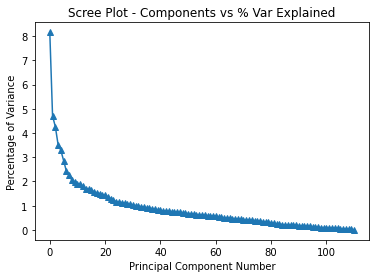

In [42]:
#scree plot
varPercentage = pca.explained_variance_ratio_*100

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(111), varPercentage[:], marker='^')
plt.title('Scree Plot - Components vs % Var Explained')
plt.xlabel('Principal Component Number')
plt.ylabel('Percentage of Variance')

In [43]:
#create reduced dataframe with 95% explained variance
X_reduced = pd.DataFrame(np.array(X_pca[:,:78]))
X_reduced.head()

0         1         2         3         4         5         6   \
0 -0.337683  0.774351  0.337455  0.515035  0.004831  0.006585  0.033816   
1 -0.011798 -0.083654 -0.095005  0.319171 -0.082500 -0.096585 -0.032589   
2  0.194804 -0.051767 -0.049989  0.360469 -0.061873 -0.043392 -0.005234   
3  0.059203 -0.082008 -0.073290  0.450149 -0.076401 -0.066362 -0.001671   
4  0.340084 -0.034825 -0.081561  0.275334 -0.127465 -0.140148  0.949757   

         7         8         9   ...        68        69        70        71  \
0 -0.021614  0.034617  0.002522  ... -0.005967 -0.002692  0.008171 -0.009543   
1 -0.120613 -0.137898 -0.333550  ... -0.003531 -0.009818  0.005915 -0.005816   
2 -0.050662  0.018790 -0.008925  ... -0.032112 -0.006979 -0.017815  0.002189   
3 -0.074072  0.020589 -0.023010  ... -0.007672 -0.001702 -0.001203  0.000278   
4  0.129012  0.053550  0.028056  ... -0.006684  0.002750  0.001289  0.002000   

         72        73        74        75        76        77  
0  0.005702  0.016050  0.006461 -0.004192 -0.031180 -0.003916  
1  0.000060  0.010765  0.003568 -0.007916 -0.039408 -0.008423  
2 -0.006834 -0.003834 -0.014892 -0.006885 -0.003842 -0.013742  
3 -0.000705  0.002531 -0.005935 -0.001928  0.003962 -0.001111  
4  0.000097  0.008065 -0.006503 -0.007155  0.017526  0.006181  

[5 rows x 78 columns]

In [44]:
#import clustering package
from sklearn.cluster import KMeans

In [45]:
#create function to check best mean silhouette value for given k
def silhouette_calc(data,N):
    '''takes in data and a value for N and checks that number of k and returns max silhouette val w/ k'''
    from sklearn import metrics
    
    res = {}
    
    for i in range(2,N+1):
        kmeans = KMeans(n_clusters=i, max_iter=100) #kmeans for i# of clusters
        kmeans.fit(data) #fit data
        clusters = kmeans.predict(data) #assign clusters
        silhouettes = metrics.silhouette_samples(data, clusters) #calc silhouette scores
        res[i] = silhouettes.mean() #stores silhouette score
    print(res)
    return max(res, key=res.get), max(res.values())

In [46]:
nclust = silhouette_calc(X_reduced, 100)
nclust

{2: 0.06913650960295828, 3: 0.07729088360457584, 4: 0.07561284101575191, 5: 0.10895773551706815, 6: 0.1281167598476823, 7: 0.16655148022768806, 8: 0.16875849009115665, 9: 0.17507674560786798, 10: 0.2083896722592923, 11: 0.20953579711962161, 12: 0.21916286203167115, 13: 0.2374877742970097, 14: 0.26089634420997154, 15: 0.2705436146357979, 16: 0.29307816988539526, 17: 0.29980358998419776, 18: 0.30528593084983763, 19: 0.33103463346851303, 20: 0.3171551740809315, 21: 0.35099594297142495, 22: 0.3541956826130641, 23: 0.369511178614305, 24: 0.36422281300995507, 25: 0.3780608694370392, 26: 0.3978509953795603, 27: 0.4102943963600306, 28: 0.4007366698196204, 29: 0.4111825943490327, 30: 0.4315326935194621, 31: 0.4384020123715427, 32: 0.44463003236805865, 33: 0.4448397446734632, 34: 0.46065162962870604, 35: 0.4697674915126712, 36: 0.4400576251555923, 37: 0.4729889152082207, 38: 0.49371490230307774, 39: 0.4849338909456417, 40: 0.502537490944333, 41: 0.49842464603990644, 42: 0.5061768946639899, 43: 0

(66, 0.6055622228270213)

In [48]:
#From silhouette results, we get a total of 66 clusters for the optimal value based on the silhouette
#Set K=20, probably won't be a meaningful col in our regression
kmeans = KMeans(n_clusters=66, max_iter=500)
kmeans.fit(X_reduced)
clusters = kmeans.predict(X_reduced)

In [49]:
def cluster_sizes(clusters):
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    
    for c in cluster_labels:
        size[c] = len(X_reduced[clusters == c])
    return size

In [50]:
size = cluster_sizes(clusters)

for c in size.keys():
    print("Size of Cluster", c,"- ",size[c])

Size of Cluster 0 -  867
Size of Cluster 1 -  1424
Size of Cluster 2 -  1237
Size of Cluster 3 -  4835
Size of Cluster 4 -  1837
Size of Cluster 5 -  1485
Size of Cluster 6 -  1284
Size of Cluster 7 -  1546
Size of Cluster 8 -  1135
Size of Cluster 9 -  3347
Size of Cluster 10 -  1281
Size of Cluster 11 -  1247
Size of Cluster 12 -  2195
Size of Cluster 13 -  2511
Size of Cluster 14 -  713
Size of Cluster 15 -  1479
Size of Cluster 16 -  1722
Size of Cluster 17 -  1272
Size of Cluster 18 -  1141
Size of Cluster 19 -  1084
Size of Cluster 20 -  740
Size of Cluster 21 -  2371
Size of Cluster 22 -  1014
Size of Cluster 23 -  934
Size of Cluster 24 -  798
Size of Cluster 25 -  810
Size of Cluster 26 -  1358
Size of Cluster 27 -  1183
Size of Cluster 28 -  679
Size of Cluster 29 -  1371
Size of Cluster 30 -  1077
Size of Cluster 31 -  845
Size of Cluster 32 -  1136
Size of Cluster 33 -  713
Size of Cluster 34 -  636
Size of Cluster 35 -  555
Size of Cluster 36 -  830
Size of Cluster 37 -  8

In [51]:
clusters

array([ 2,  1, 26, ..., 11, 21,  3], dtype=int32)

In [56]:
#add back to X_norm
X_norm['Cluster'] = clusters

In [57]:
#Make it a dummy variable
X_norm = pd.get_dummies(X_norm, columns=['Cluster'])
X_norm.head(20)

avgrev_overall  avgrev_aroma  avgrev_appearance  avgrev_palate  \
0         0.791667      0.750000           0.708333       0.791667   
1         0.675000      0.700000           0.737500       0.675000   
2         0.637382      0.551297           0.621462       0.579599   
3         0.676739      0.628991           0.709094       0.628278   
4         0.566578      0.544765           0.562785       0.526745   
5         0.661765      0.520221           0.573529       0.575368   
6         0.600216      0.463362           0.512931       0.525862   
7         0.706529      0.686802           0.734113       0.685580   
8         0.598529      0.597059           0.625000       0.558824   
9         0.677326      0.691860           0.768895       0.633721   
10        0.562500      0.514881           0.523810       0.525298   
11        0.718750      0.681875           0.723125       0.673125   
12        0.691667      0.641667           0.703333       0.660833   
13        0.729167      0.666667           0.666667       0.729167   
14        0.600764      0.519422           0.612716       0.565073   
15        0.681818      0.579545           0.568182       0.590909   
16        0.757415      0.747881           0.794280       0.752754   
17        0.765625      0.692708           0.755208       0.734375   
18        0.802817      0.815141           0.845070       0.801056   
19        0.742908      0.683511           0.707447       0.691489   

    avgrev_taste  beer_abv  firstrev_time  beer_style_Altbier  \
0       0.791667  0.115965       0.367403                 0.0   
1       0.612500  0.103831       0.365195                 0.0   
2       0.585200  0.077830       0.317026                 0.0   
3       0.661345  0.096897       0.294209                 0.0   
4       0.525417  0.072630       0.335306                 0.0   
5       0.558824  0.072630       0.366152                 0.0   
6       0.510776  0.072630       0.361456                 0.0   
7       0.691865  0.121165       0.326071                 0.0   
8       0.567647  0.081297       0.139142                 0.0   
9       0.671512  0.103831       0.137007                 0.0   
10      0.507440  0.072630       0.132559                 0.0   
11      0.673750  0.103831       0.160316                 0.0   
12      0.670000  0.109031       0.160316                 0.0   
13      0.750000  0.093430       0.324909                 0.0   
14      0.535691  0.084763       0.188429                 0.0   
15      0.602273  0.083030       0.324005                 0.0   
16      0.779449  0.084763       0.099286                 0.0   
17      0.736979  0.086497       0.328638                 0.0   
18      0.832746  0.107298       0.353993                 0.0   
19      0.714539  0.096897       0.251773                 0.0   

    beer_style_American Adjunct Lager  beer_style_American Amber / Red Ale  \
0                                 0.0                                  0.0   
1                                 0.0                                  0.0   
2                                 0.0                                  0.0   
3                                 0.0                                  0.0   
4                                 0.0                                  0.0   
5                                 1.0                                  0.0   
6                                 0.0                                  0.0   
7                                 0.0                                  0.0   
8                                 0.0                                  0.0   
9                                 0.0                                  0.0   
10                                0.0                                  0.0   
11                                0.0                                  0.0   
12                                0.0                                  0.0   
13                                0.0                                  0.0 

In [58]:
#transform y to log2
y_trans = np.log2(y)
y_trans.head()

ctrev
0  1.584963
1  3.321928
2  8.727920
3  9.776433
4  9.364135

# Linear Regression

In [59]:
#train test split size 80/20, random_state=33
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_norm,y_trans, test_size = .2, random_state=33)

In [60]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(52832, 177) (13208, 177) (52832, 1) (13208, 1)


In [61]:
#import linear regression module, fit training data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [65]:
#RMSE calculation on training data
from sklearn.metrics import mean_squared_error
p_train = linreg.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(p_train, y_train))
print("RMSE on Train Data: ", rmse_train)

RMSE on Train Data:  1.9783470536846097


Text(0.5, 1.0, 'Target Train vs Predicted Train')

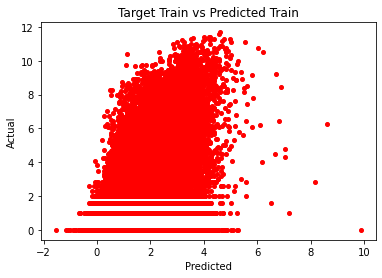

In [66]:
#Correlation between predicted and actual values of target attr
plt.plot(p_train, y_train, 'ro', markersize=4)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Target Train vs Predicted Train")

In [68]:
#RMSE calculation on test data - shockingly high
p_test = linreg.predict(X_test)
rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print("RMSE on Test Data: ",rmse_test)

RMSE on Test Data:  14161498098.74064


In [73]:
X_names = X_train.columns
X_names

Index(['avgrev_overall', 'avgrev_aroma', 'avgrev_appearance', 'avgrev_palate',
       'avgrev_taste', 'beer_abv', 'firstrev_time', 'beer_style_Altbier',
       'beer_style_American Adjunct Lager',
       'beer_style_American Amber / Red Ale',
       ...
       'Cluster_56', 'Cluster_57', 'Cluster_58', 'Cluster_59', 'Cluster_60',
       'Cluster_61', 'Cluster_62', 'Cluster_63', 'Cluster_64', 'Cluster_65'],
      dtype='object', length=177)

In [74]:
#find the best features based on RMSE values
def feature_selection(X, y, model, K=5):
    '''takes in the training/target variable and returns optimal percentage of the most informative features to use'''
    #import necessary packages
    from sklearn import feature_selection
    from sklearn.metrics import mean_absolute_error
    from sklearn.model_selection import cross_val_score
    
    err = {}
    attrs = {}
    #cross validation / feature selection / mean squared error
    for i in range(1,101):
        #convert data to np arrays
        X = np.array(X)
        y = np.array(y)
        
        #SelectPercentile, fit model, perform cv RMSE
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile=i)
        X_train_fs = fs.fit_transform(X, y)
        scores = abs(cross_val_score(model, X_train_fs, y, scoring = 'neg_root_mean_squared_error', cv=K))
        #print(scores)
        #store percentile and avg cross val score
        err[i] = scores.mean()
        
        #store optimal features
        X = pd.DataFrame(X, columns=X_names)
        attrs[i] = X.columns[fs.get_support()].values
        #calculate RMSE w/ percentile
    
    
    plt.plot(err.keys(), err.values())
    plt.title("Root Mean Squared Error with Percent of Features Selected")
    plt.xlabel("Percentage of Features Selected")
    plt.ylabel("Cross Validation Root Mean Squared Error")
    
    return min(err, key=err.get), attrs

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

18

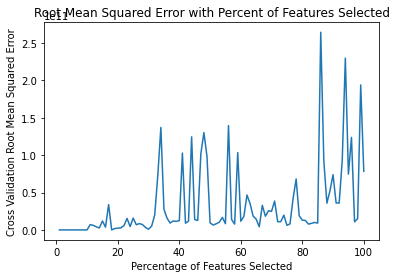

In [75]:
#Return Optimal Index and Plot of RMSE, keep 100% of features selected for lowest RMSE
ind,attrs =feature_selection(X_train, y_train, linreg)
ind

In [77]:
#Create subset train/test data w/ optimal features, 18% fs
X_train_fs = X_train[attrs[ind]]
X_test_fs = X_test[attrs[ind]]

In [210]:
attrs[ind]

array(['avgrev_overall', 'avgrev_aroma', 'avgrev_appearance', 'avgrev_palate', 'avgrev_taste', 'beer_abv',
       'firstrev_time', 'beer_style_American Double / Imperial IPA', 'beer_style_American Double / Imperial Stout',
       'beer_style_American IPA', 'beer_style_Belgian Strong Dark Ale', 'beer_style_Belgian Strong Pale Ale',
       'beer_style_English Bitter', 'beer_style_Euro Pale Lager', 'beer_style_Gueuze',
       'beer_style_Herbed / Spiced Beer', 'beer_style_Lambic - Fruit', 'beer_style_Quadrupel (Quad)',
       'beer_style_Russian Imperial Stout', 'Cluster_0', 'Cluster_2', 'Cluster_3', 'Cluster_5', 'Cluster_6',
       'Cluster_7', 'Cluster_15', 'Cluster_20', 'Cluster_23', 'Cluster_31', 'Cluster_38', 'Cluster_43'], dtype=object)

In [80]:
#identify features with most impact => reviews, beer_abv, first review time, beer styles, then some clusters
X_train_fs.head()

avgrev_overall  avgrev_aroma  avgrev_appearance  avgrev_palate  \
38860        0.625000      0.562500           0.562500        0.56250   
59081        0.750000      0.625000           0.750000        0.75000   
23344        0.708333      0.583333           0.666667        0.62500   
7590         0.635870      0.635870           0.706522        0.63587   
50376        0.812500      0.750000           0.718750        0.75000   

       avgrev_taste  beer_abv  firstrev_time  \
38860      0.562500  0.072110       0.803347   
59081      0.875000  0.115965       0.961909   
23344      0.666667  0.072630       0.620197   
7590       0.652174  0.138499       0.468134   
50376      0.781250  0.091697       0.903895   

       beer_style_American Double / Imperial IPA  \
38860                                        0.0   
59081                                        0.0   
23344                                        0.0   
7590                                         0.0   
50376                                        0.0   

       beer_style_American Double / Imperial Stout  beer_style_American IPA  \
38860                                          0.0                      0.0   
59081                                          0.0                      0.0   
23344                                          0.0                      0.0   
7590                                           0.0                      0.0   
50376                                          0.0                      0.0   

       ...  Cluster_3  Cluster_5  Cluster_6  Cluster_7  Cluster_15  \
38860  ...          0          0          0          0           0   
59081  ...          0          0          0          0           0   
23344  ...          0          1          0          0           0   
7590   ...          0          0          0          0           0   
50376  ...          0          0          0          0           0   

       Cluster_20  Cluster_23  Cluster_31  Cluster_38  Cluster_43  
38860           0           0           0           0           0  
59081           0           0           0           0           0  
23344           0           0           0           0           0  
7590            0           0           1           0           0  
50376           0           0           0           0           0  

[5 rows x 31 columns]

In [82]:
#Use 18% attrs to retrain new fs model, calc the RMSE test train => Wow what an improvement
from sklearn.metrics import mean_absolute_error, mean_squared_error
linreg_fs = LinearRegression()
linreg_fs.fit(X_train_fs, y_train)
p_train = linreg_fs.predict(X_train_fs)
p_test = linreg_fs.predict(X_test_fs)
rmse_train = mean_squared_error(p_train, y_train)
rmse_test = mean_squared_error(p_test, y_test)
print(f"RMSE train: {rmse_train}")
print(f"RMSE test: {rmse_test}")

RMSE train: 3.985974675645073
RMSE test: 3.967353813725958


# Summary
Removing 82% of the data clearly reduced the noise that took place in the original model, which increased our RMSE train, but more importantly, significantly decreased our RMSE test value. You can see from our features selected graph that the more features seem to make our RMSE value more volatile, and with cross validation, that tells us a lower # of features is optimal.

# Ridge & Lasso Regression

In [83]:
#find optimal alpha/weight for regularized regression techniques
def ridge_lasso(X, y, a, model, K=5):
    '''performs Ridge or Lasso regression to find best alpha value and plots RMSE'''
    
    #import pertinent packages
    from sklearn.linear_model import Lasso
    from sklearn.linear_model import Ridge
    from sklearn.model_selection import cross_val_score
    
    #set range for alpha hyperparameter
    if model == "L":
        
        alpha = np.linspace(.0001, a, 100)
    elif model == "R":
        alpha = np.linspace(.001, a, 100)
        
    
    cv = {}
    train = {}
    
    #Train model, cv, store error terms
    for i in alpha:
        
        #determine type (Ridge/Lasso) and fit model w/ i alpha level
        if model == "L":
            m = Lasso(alpha=i)
            m.fit(X, y)
            p = m.predict(X)
            rmse_train = np.sqrt(mean_squared_error(p, y))
        elif model == "R":
            m = Ridge(alpha=i)
            m.fit(X, y)
            p = m.predict(X)
            rmse_train = np.sqrt(mean_squared_error(p, y))
        #perform cv, store rmse scores
        scores = abs(cross_val_score(m, X, y, scoring = 'neg_root_mean_squared_error', cv=K))
        
        cv[i] = scores.mean()
        train[i] = rmse_train
       
    #plot error values
    plt.plot(cv.keys(), cv.values(), label="RMSE-XVal")
    plt.plot(train.keys(), train.values(), label="RMSE-Train")
    if model == "L":
        plt.title("Lasso Regression RMSE values for Given Alpha")
    else:
        plt.title("Ridge Regression RMSE values for Given Alpha")
    plt.legend(('RMSE-XVal', 'RMSE-Train'))
    plt.xlabel("Alpha")
    plt.ylabel("RMSE")
    
    return min(cv, key=cv.get), min(cv.values())

(0.0001, 1.983337749090484)

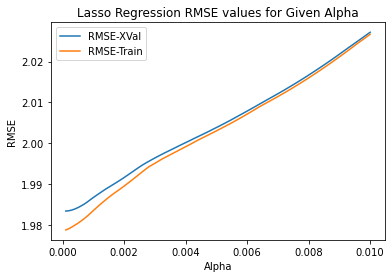

In [84]:
#Lasso Regression
l = ridge_lasso(X_train, y_train, .01 , "L")
l

(0.405, 1.98337569130553)

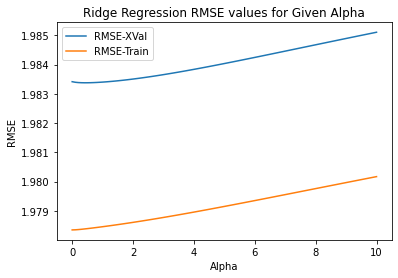

In [85]:
#Ridge Regression
r = ridge_lasso(X_train, y_train, 10, "R")
r

In [86]:
#Lasso Regression - optimal alpha
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=l[0])
lasso.fit(X_train, y_train)
p_test = lasso.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(p_test, y_test))
print(f"Lasso RMSE test: {rmse_test}")

Lasso RMSE test: 1.9803915577531586


In [87]:
#Ridge Regression - optimal alpha
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=r[0])
ridge.fit(X_train, y_train)
p_test = ridge.predict(X_test)

RMSE_test = np.sqrt(mean_squared_error(p_test, y_test))
print(f"Ridge RMSE test: {RMSE_test}")

Ridge RMSE test: 1.9807912000775116


In [88]:
#predict X_test, graph results
pred_lasso = lasso.predict(X_test)
pred_ridge = ridge.predict(X_test)

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctrev', ylabel='Density'>

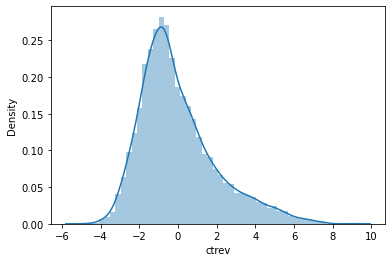

In [90]:
import seaborn as sns
sns.distplot(y_test['ctrev']-pred_lasso)

/Users/bgxc123/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctrev', ylabel='Density'>

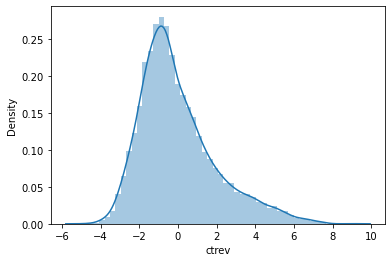

In [91]:
sns.distplot(y_test['ctrev']-pred_ridge[:,0])

In [92]:
lasso.coef_

array([-0.03,  0.75,  0.91,  0.23, -0.48, 11.12, -4.08, -0.25,  0.41, -0.  ,  0.23, -0.56,  0.76,  0.02,  0.  , -0.01,
        0.  ,  0.56,  0.42,  0.26,  0.9 ,  0.  ,  0.31,  0.  ,  0.  , -0.  ,  0.  ,  0.22,  0.16, -0.28,  0.77, -0.18,
        0.  ,  0.  ,  0.68,  0.71,  0.28,  0.  , -0.4 , -0.  , -0.49, -0.18, -0.11,  0.  , -0.41, -0.16, -0.13, -0.4 ,
       -1.26, -0.32, -0.53, -0.17, -0.22,  0.3 , -0.01, -0.2 ,  0.08, -0.32, -0.29, -0.  , -0.31, -0.05, -0.32,  1.06,
        0.58,  0.63,  0.07, -0.02,  0.  ,  1.1 ,  1.9 , -0.15, -0.22, -0.2 , -0.05, -0.15,  0.07, -0.37, -0.1 ,  1.56,
        0.  ,  0.83,  0.  ,  0.33,  1.05, -0.58,  0.19, -0.34, -0.07, -0.21,  0.06,  0.  ,  0.25,  0.47,  0.13, -0.09,
        0.  , -0.  ,  0.47,  0.38, -0.06, -0.27, -0.2 ,  0.27,  0.  , -0.09, -0.11, -0.38,  0.  ,  0.04,  0.  ,  0.14,
       -0.29,  0.  ,  0.11, -0.01, -0.  , -0.51,  0.47, -0.  ,  0.09,  0.12,  0.19,  0.04, -0.03,  0.02, -0.  , -0.  ,
       -0.  ,  0.  ,  0.23,  0.1 ,  0.14, -0.  ,

Text(0.5, 1.0, 'Values per Regression Coefficient')

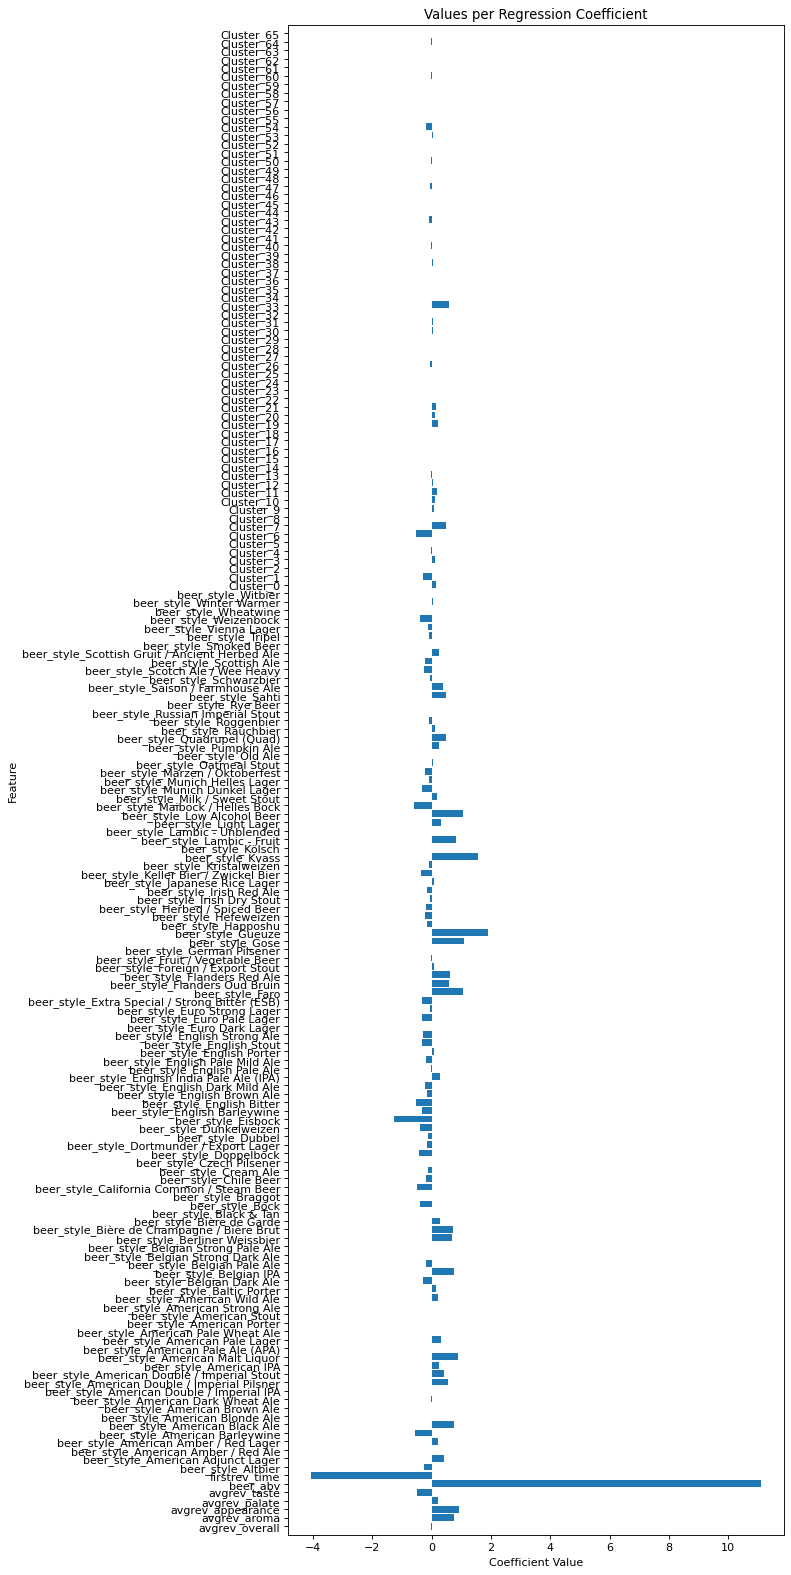

In [93]:
#lasso regression feature importance
X_names = X_train.columns.values
plt.figure(figsize=(8, 25), dpi=80)
plt.barh(range(len(X_names)), lasso.coef_, align='center')
plt.yticks(np.arange(len(X_names)), X_names)
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.ylim(-1, len(X_names))
plt.title("Values per Regression Coefficient")

# KNN

In [94]:
#discretize the target variable y
y_trans.head()

ctrev
0  1.584963
1  3.321928
2  8.727920
3  9.776433
4  9.364135

In [119]:
#divide data in 2 bins, low/high ~90/10
bins = pd.DataFrame(pd.qcut(y['ctrev'], q=[0,.91,1], labels=["low","high"]))

In [120]:
bins.value_counts()

ctrev
low      60146
high      5894
dtype: int64

In [121]:
y_check = y
y_check['label'] = bins['ctrev']

In [122]:
#highest value for "low"
y_check[y_check['label']=='low'].max()

ctrev     40
label    low
dtype: object

In [123]:
#Train/Test split again w/ classfier
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_norm,bins, test_size = .2, random_state=44)

In [124]:
#import KNeighbors Classifier
from sklearn import neighbors

In [125]:
def knnClassifier(K, w):
    '''takes in a K value and whether there should be distance weighting an returns the accuracies'''
    from sklearn import neighbors
    acc = []
    if w == 0:
        w = 'uniform'
    elif w == 1:
        w = 'distance'
    for i in range(1, K+1,5):
        knnclf = neighbors.KNeighborsClassifier(i, weights=w)
        knnclf.fit(X_train2, y_train2['ctrev'])
        acc.append(knnclf.score(X_test2, y_test2))
    return acc

In [126]:
#uniform/distance knn acc
uniknn = knnClassifier(50,0)
distknn = knnClassifier(50,1)

In [127]:
uniknn

[0.8709872804360993,
 0.8932465172622653,
 0.9142943670502726,
 0.9133858267716536,
 0.91671714112659,
 0.9151271956390067,
 0.9154300423985463,
 0.9135372501514234,
 0.9146729254996971,
 0.914824348879467]

In [128]:
distknn

[0.8709872804360993,
 0.9058903694730467,
 0.9151271956390067,
 0.9170199878861296,
 0.9182313749242883,
 0.9171714112658994,
 0.9177013930950939,
 0.916641429436705,
 0.9171714112658994,
 0.9169442761962447]

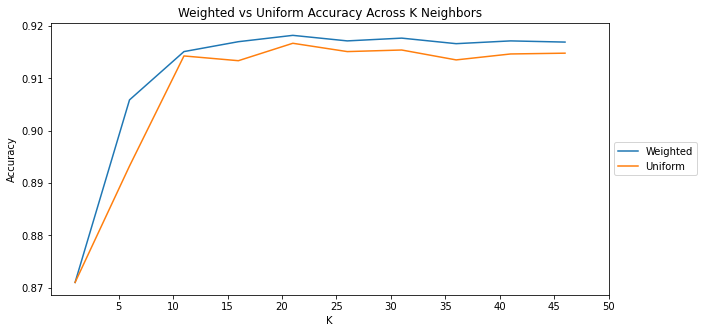

In [129]:
#weighted vs uniform graph
K = list(range(1,51,5))
plt.figure(figsize=(10,5))
plt.plot(K, distknn, label = 'Weighted')
plt.plot(K, uniknn, label = 'Uniform')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Weighted vs Uniform Accuracy Across K Neighbors')
plt.xticks(range(5,51,5))
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

In [130]:
#create best knn model k=21, weights = distance
knnclf = neighbors.KNeighborsClassifier(21, weights='distance')
knnclf.fit(X_train2, y_train2['ctrev'])

KNeighborsClassifier(n_neighbors=21, weights='distance')

In [131]:
#acc score
knnclf.score(X_test2, y_test2)

0.9182313749242883

In [132]:
knnpreds_test = knnclf.predict(X_test2)
knnpreds_test

array(['low', 'low', 'low', ..., 'low', 'low', 'low'], dtype=object)

In [133]:
#how good at classifying smaller category "high?"
from sklearn.metrics import confusion_matrix
knncm = confusion_matrix(y_test2, knnpreds_test)
print(knncm)

[[  326   858]
 [  222 11802]]


In [134]:
y_test2.value_counts()

ctrev
low      12024
high      1184
dtype: int64

In [135]:
#Classification Report, recall .28 for high, .98 for low, not good at classifying the high class
from sklearn.metrics import classification_report
print(classification_report(y_test2, knnpreds_test))

              precision    recall  f1-score   support

        high       0.59      0.28      0.38      1184
         low       0.93      0.98      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.76      0.63      0.67     13208
weighted avg       0.90      0.92      0.90     13208



In [136]:
from sklearn.metrics import recall_score
print(recall_score(y_test2,knnpreds_test, average="macro"))

0.6284373819927712


In [137]:
#run model for optimal recall score instead of accuracy
def knnClassifier2(K, w):
    '''takes in a K value and whether there should be distance weighting an returns the accuracies'''
    from sklearn import neighbors
    from sklearn.metrics import recall_score
    rec = []
    if w == 0:
        w = 'uniform'
    elif w == 1:
        w = 'distance'
    for i in range(1, K+1,5):
        knnclf = neighbors.KNeighborsClassifier(i, weights=w)
        knnclf.fit(X_train2, y_train2['ctrev'])
        knnpreds_test = knnclf.predict(X_test2)
        rec.append(recall_score(y_test2,knnpreds_test, average="macro"))
    return rec

In [138]:
#uniform/distance knn acc
uniknn = knnClassifier2(50,0)
distknn = knnClassifier2(50,1)

In [139]:
uniknn

[0.6991905827983672,
 0.7030404281527036,
 0.648356440272608,
 0.6459538692884501,
 0.6146614428800058,
 0.610742479005952,
 0.5869238437539336,
 0.5763664113215011,
 0.566710891280502,
 0.5633676341011671]

In [140]:
distknn

[0.6991905827983672,
 0.6833349067630505,
 0.6598545589002176,
 0.6414777427127727,
 0.6284373819927712,
 0.6171952266637896,
 0.605303469637302,
 0.5925384591178005,
 0.5894031194368021,
 0.5816640929852008]

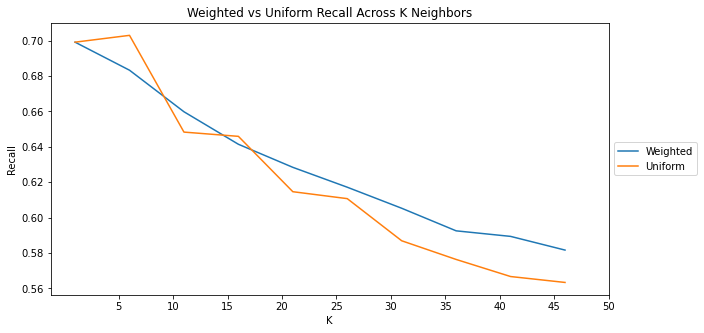

In [141]:
#weighted vs uniform graph
K = list(range(1,51,5))
plt.figure(figsize=(10,5))
plt.plot(K, distknn, label = 'Weighted')
plt.plot(K, uniknn, label = 'Uniform')
plt.xlabel('K')
plt.ylabel('Recall')
plt.title('Weighted vs Uniform Recall Across K Neighbors')
plt.xticks(range(5,51,5))
plt.legend(loc='center left',bbox_to_anchor=(1,.5))

In [142]:
#create model for K=6, uniform
knnclf = neighbors.KNeighborsClassifier(6, weights='uniform')
knnclf.fit(X_train2, y_train2['ctrev'])

KNeighborsClassifier(n_neighbors=6)

In [143]:
#acc score, still pretty high but with better recall
knnclf.score(X_test2, y_test2)

0.8932465172622653

In [144]:
#predict test labels
knnpreds_test = knnclf.predict(X_test2)

In [145]:
#confusion matrix
knncm = confusion_matrix(y_test2, knnpreds_test)
print(knncm)

[[  558   626]
 [  784 11240]]


In [146]:
#classification report
print(classification_report(y_test2, knnpreds_test))

              precision    recall  f1-score   support

        high       0.42      0.47      0.44      1184
         low       0.95      0.93      0.94     12024

    accuracy                           0.89     13208
   macro avg       0.68      0.70      0.69     13208
weighted avg       0.90      0.89      0.90     13208



# Summary
Adjusting from K=26, distance to K=6, uniform I believe is a better generalization for this model. This is because the recall score got 19% better for the high, with the overall accruacy only getting ~2% worse. While the recall is still low, this is the best we can do with the dataset when we try and predict the smaller category of the target labels.

# Decision Trees

In [147]:
#utilize grid search to find optimal parameters for our decision tree
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [148]:
#set parameters, create gs/treeclf
parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': np.linspace(1, 30, 15, dtype=int),
    'min_samples_split': np.linspace(2,20,10, dtype=int)
}
treeclf = tree.DecisionTreeClassifier()
gs = GridSearchCV(treeclf, parameters, verbose=1, cv=5)

In [149]:
#run gs on tree
%time _ = gs.fit(X_train2, y_train2)

params, score = gs.best_params_, gs.best_score_
params, score

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 16.3min finished


CPU times: user 14min 55s, sys: 1min 11s, total: 16min 6s
Wall time: 16min 18s


({'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 18},
 0.9216762724091074)

In [150]:
#best model: criterion=>entropy, max_depth=>13, min_samples_split=>18
treeclf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=18)
treeclf.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=13, min_samples_split=18)

In [151]:
#Train Score
treeclf.score(X_train2, y_train2)

0.9418534221683827

In [152]:
#Test Score
treeclf.score(X_test2, y_test2)

0.9233040581465778

In [153]:
treepreds_test = treeclf.predict(X_test2)

In [154]:
#confusion matrix
treecm = confusion_matrix(y_test2, treepreds_test)
print(treecm)

[[  517   667]
 [  346 11678]]


In [155]:
#classification report
print(classification_report(y_test2, treepreds_test))

              precision    recall  f1-score   support

        high       0.60      0.44      0.51      1184
         low       0.95      0.97      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.77      0.70      0.73     13208
weighted avg       0.91      0.92      0.92     13208



In [156]:
import graphviz

In [157]:
from sklearn.tree import export_graphviz

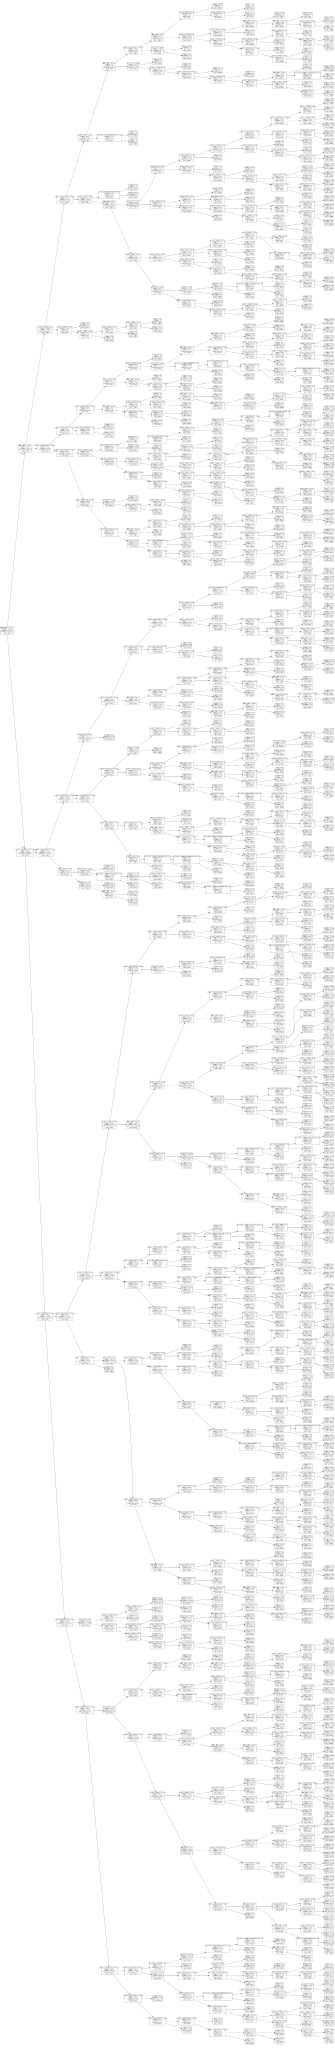

In [158]:
#accuracy optimized decision tree
export_graphviz(treeclf,out_file='tree.dot', feature_names=X_train2.columns, class_names=["high","low"],
                rotate=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [159]:
#create a gs with optimizing recall
parameters = {
    'criterion': ['gini','entropy'],
    'max_depth': np.linspace(1, 30, 15, dtype=int),
    'min_samples_split': np.linspace(2,20,10, dtype=int)
}
treeclf2 = tree.DecisionTreeClassifier()
gs2 = GridSearchCV(treeclf2, parameters, verbose=1, cv=5, scoring='recall_macro')

In [160]:
#run new gs on tree
%time _ = gs2.fit(X_train2, y_train2)

#params, score = gs.best_params_, gs.best_score_
#params, score

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 17.4min finished


CPU times: user 16min 7s, sys: 1min 11s, total: 17min 19s
Wall time: 17min 27s


In [161]:
gs2.best_params_, gs2.best_score_

({'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 10},
 0.7390878934134045)

In [162]:
#fit new model
treeclf2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=10)
treeclf2.fit(X_train2, y_train2)

DecisionTreeClassifier(criterion='entropy', max_depth=30, min_samples_split=10)

In [163]:
#Train Score
treeclf2.score(X_train2, y_train2)

0.9806745911568746

In [164]:
#Test Score, overfitting some
treeclf2.score(X_test2, y_test2)

0.9183070866141733

In [165]:
treepreds2_test = treeclf2.predict(X_test2)

In [166]:
#confusion matrix
treecm2 = confusion_matrix(y_test2, treepreds2_test)
print(treecm2)

[[  635   549]
 [  530 11494]]


In [167]:
#classification report
print(classification_report(y_test2, treepreds2_test))

              precision    recall  f1-score   support

        high       0.55      0.54      0.54      1184
         low       0.95      0.96      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.75      0.75      0.75     13208
weighted avg       0.92      0.92      0.92     13208



In [168]:
import graphviz

In [169]:
from sklearn.tree import export_graphviz

In [170]:
#full decision tree, max_depth 30
export_graphviz(treeclf2,out_file='tree.dot', feature_names=X_train2.columns, class_names=["high","low"],
                rotate=True)

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Summary
As seen from the decision tree graph, the first time at which a beer is reviewed matters the most in our model to predict how much a beer has been reviewed. Other important features revolve around the average review scores for each beer, sprinkled in with some of the cluster/dummy data as well. Since this tree has a max depth of 30, it is a little more difficult to interpret, but in terms of accuracy, it performs better than our KNN model. We get a macro recall score of 75%, compared to the 70% of our best KNN model. However, it does appear that we are overfitting due to the disparity between the train and test accuracy scores. Overall, I think I still would take the latter decision tree model just due to the fact that it is actually able to classify more than have of the high reviewed beer correctly.

# Ensemble Method - Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=55)
rf = rf.fit(X_train2, y_train2['ctrev'])

In [172]:
#basic rf to see results
rfpreds_test = rf.predict(X_test2)

In [173]:
#classification report, worse than both of our prior models for KNN/Decision Trees
print(classification_report(y_test2, rfpreds_test))

              precision    recall  f1-score   support

        high       0.66      0.46      0.54      1184
         low       0.95      0.98      0.96     12024

    accuracy                           0.93     13208
   macro avg       0.80      0.72      0.75     13208
weighted avg       0.92      0.93      0.92     13208



In [174]:
print(rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 55, 'verbose': 0, 'warm_start': False}


In [175]:
#use calc_params function to test different parameter optimizations
from sklearn.model_selection import KFold

def calc_params(X, y, clf, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)

    # initialize training and testing score arrays with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    
    # iterate over the different parameter values
    for i, param_value in enumerate(param_values):

        # set classifier parameters
        clf.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(n_splits=K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        j = 0
        for train, test in cv.split(X):
            # fit the classifier in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            clf.fit(X[train], y[train])
            k_train_scores[j] = clf.score(X[train], y[train])
            k_test_scores[j] = clf.score(X[test], y[test])
            j += 1
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        test_scores[i] = np.mean(k_test_scores)
        print(param_name, '=', param_value, "Train =", train_scores[i], "Test =", test_scores[i])
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores

In [176]:
ms = range(1,20)

min_samples_leaf = 1 Train = 0.9976198123158513 Test = 0.9299856117623462
min_samples_leaf = 2 Train = 0.9670086406223151 Test = 0.9291338086755792
min_samples_leaf = 3 Train = 0.9521454786845714 Test = 0.9273356488717577
min_samples_leaf = 4 Train = 0.9449954626204526 Test = 0.9265784961453342
min_samples_leaf = 5 Train = 0.9391893087202658 Test = 0.925594285732813
min_samples_leaf = 6 Train = 0.935408470939899 Test = 0.9245153622645409
min_samples_leaf = 7 Train = 0.9323799932678096 Test = 0.9238718351112227
min_samples_leaf = 8 Train = 0.9303641695691363 Test = 0.9233797084093942
min_samples_leaf = 9 Train = 0.928996625782118 Test = 0.9218843817519036
min_samples_leaf = 10 Train = 0.9276054258986042 Test = 0.9220736806812934
min_samples_leaf = 11 Train = 0.9258167384787704 Test = 0.921278695754971
min_samples_leaf = 12 Train = 0.924936583970793 Test = 0.9211651525815434
min_samples_leaf = 13 Train = 0.9245627647344703 Test = 0.920975893060695
min_samples_leaf = 14 Train = 0.92325673

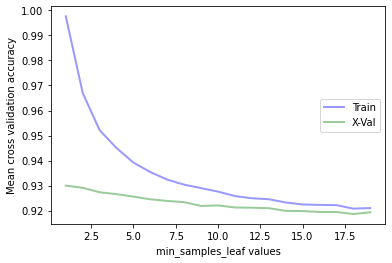

In [177]:
#test values for min_samples_leaf: 8 works best
rf = RandomForestClassifier(n_estimators=10, random_state=55)
train_scores, test_scores = calc_params(X_train2, y_train2['ctrev'], rf, ms, 'min_samples_leaf',5)

In [178]:
m_depth = range(1,20)

max_depth = 1 Train = 0.9108494816778107 Test = 0.9108494294386571
max_depth = 2 Train = 0.9108494816778107 Test = 0.9108494294386571
max_depth = 3 Train = 0.9108494816778107 Test = 0.9108494294386571
max_depth = 4 Train = 0.9108494816778107 Test = 0.9108494294386571
max_depth = 5 Train = 0.9108494816778107 Test = 0.9108494294386571
max_depth = 6 Train = 0.9109346585380969 Test = 0.9109062135644523
max_depth = 7 Train = 0.9109488527781796 Test = 0.9109251439947805
max_depth = 8 Train = 0.9115734759215869 Test = 0.9113037042363162
max_depth = 9 Train = 0.9132060037489718 Test = 0.9123826133742092
max_depth = 10 Train = 0.9136224220515174 Test = 0.9119472475113103
max_depth = 11 Train = 0.9151745034989874 Test = 0.9131586732440955
max_depth = 12 Train = 0.9186099332508194 Test = 0.9146917962755381
max_depth = 13 Train = 0.9210516171797967 Test = 0.915543608318792
max_depth = 14 Train = 0.927312042182199 Test = 0.9190452184532788
max_depth = 15 Train = 0.9262426174061827 Test = 0.91787167

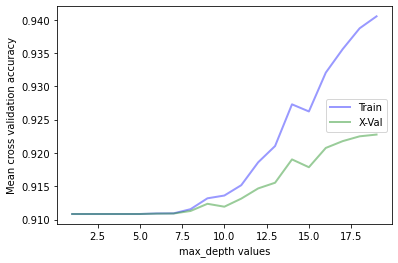

In [179]:
#max_depth has a good value at 12 so we are more accurate but not overfitting the training data
rf = RandomForestClassifier(n_estimators=10, random_state=55)
train_scores, test_scores = calc_params(X_train2, y_train2['ctrev'], rf, m_depth, 'max_depth',5)

In [180]:
nest = range(5,101,5)

n_estimators = 5 Train = 0.9909193300440939 Test = 0.9250454053572437
n_estimators = 10 Train = 0.9976198123158513 Test = 0.9299856117623462
n_estimators = 15 Train = 0.9981592578152612 Test = 0.9317837429054101
n_estimators = 20 Train = 0.9992854709713985 Test = 0.9327111978528937
n_estimators = 25 Train = 0.9993801104718087 Test = 0.9326922656312682
n_estimators = 30 Train = 0.9997728645048716 Test = 0.9335061702401347
n_estimators = 35 Train = 0.9998012564557575 Test = 0.9329951220644646
n_estimators = 40 Train = 0.9999195565310123 Test = 0.9336765029132496
n_estimators = 45 Train = 0.9999148245951772 Test = 0.9334682932578021
n_estimators = 50 Train = 0.9999526803057742 Test = 0.9339036555381066
n_estimators = 55 Train = 0.9999384841623933 Test = 0.9335440113965202
n_estimators = 60 Train = 0.9999763402088666 Test = 0.934263244149475
n_estimators = 65 Train = 0.9999763400969076 Test = 0.933884701820913
n_estimators = 70 Train = 0.9999952679522064 Test = 0.9338657767644767
n_estimat

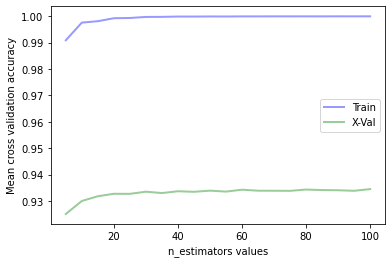

In [181]:
#number of estimators, 20 looks pretty good!
rf = RandomForestClassifier(n_estimators=10, random_state=55)
train_scores, test_scores = calc_params(X_train2, y_train2['ctrev'], rf, nest, 'n_estimators',5)

In [182]:
#final rf model with selected parameters 20, 8, 12
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=8, max_depth=12, random_state=55)
rf.fit(X_train2, y_train2['ctrev'])

RandomForestClassifier(max_depth=12, min_samples_leaf=6, n_estimators=20,
                       random_state=55)

In [183]:
rfpreds_test = rf.predict(X_test2)

In [184]:
#classification report, good at predicting low, but terrible recall score for high
print(classification_report(y_test2, rfpreds_test))

              precision    recall  f1-score   support

        high       0.83      0.08      0.15      1184
         low       0.92      1.00      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.88      0.54      0.55     13208
weighted avg       0.91      0.92      0.88     13208



In [185]:
#let's try grid search now

rf2 = RandomForestClassifier()
parameters = {
    'min_samples_leaf': range(1,22,5),
    'max_depth': range(1,22,5),
    'n_estimators': range(5,51,5)
}

gs = GridSearchCV(rf2, parameters, verbose=1, cv=5, scoring='recall_macro')

In [186]:
#run gs on rf
%time _ = gs.fit(X_train2, y_train2['ctrev'])

#params, score = gs.best_params_, gs.best_score_
#params, score

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 22.2min finished


CPU times: user 20min 50s, sys: 1min 6s, total: 21min 57s
Wall time: 22min 11s


In [187]:
#retreive best parameteres for optimal recall
gs.best_params_, gs.best_score_

({'max_depth': 21, 'min_samples_leaf': 1, 'n_estimators': 5},
 0.6230263991907622)

In [188]:
#train model for optimal recall
rf2 = RandomForestClassifier(n_estimators=5, min_samples_leaf=1, max_depth=21, random_state=55)
rf2.fit(X_train2, y_train2['ctrev'])

RandomForestClassifier(max_depth=21, n_estimators=5, random_state=55)

In [191]:
#check train and test scores
from sklearn import metrics
from sklearn.metrics import accuracy_score
rf2_predtrain = accuracy_score(y_train2, rf2.predict(X_train2))
rf2_predtest = accuracy_score(y_test2, rf2.predict(X_test2))
rf2_predtrain, rf2_predtest

(0.9518284373107208, 0.9245154451847365)

In [192]:
#classification report, good at predicting low, but terrible recall score for high
rf2preds_test = rf2.predict(X_test2)
print(classification_report(y_test2, rf2preds_test))

              precision    recall  f1-score   support

        high       0.70      0.28      0.40      1184
         low       0.93      0.99      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.82      0.63      0.68     13208
weighted avg       0.91      0.92      0.91     13208



In [193]:
#confusion matrix
rfcm2 = confusion_matrix(y_test2, rf2preds_test)
print(rfcm2)

[[  326   858]
 [  139 11885]]


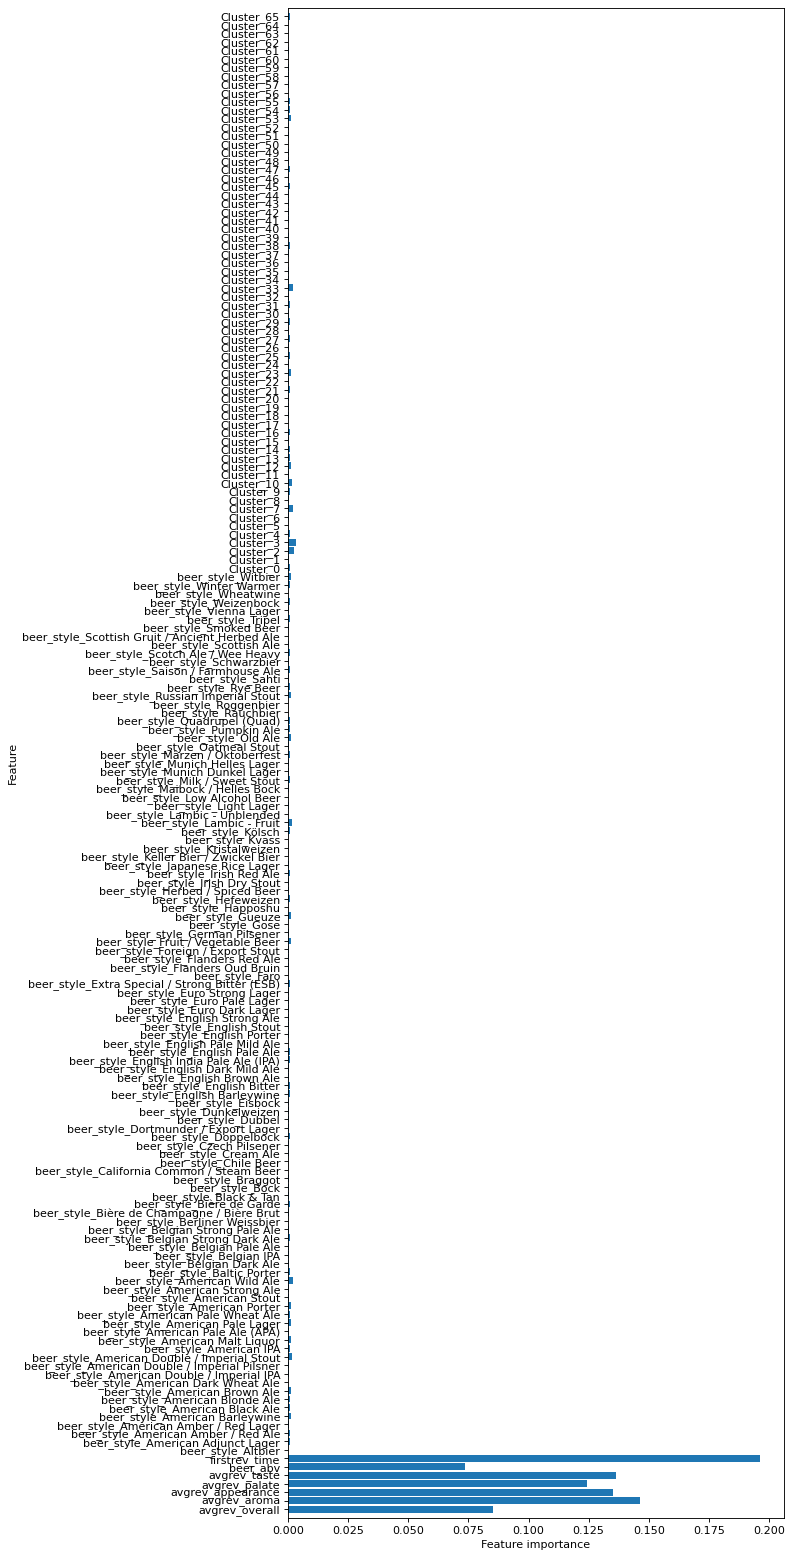

In [194]:
#most effective attrs
def plot_feature_importances(model, n_features, feature_names):
    plt.figure(figsize=(8, 25), dpi=80)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

features = X_train2.columns
plot_feature_importances(rf2, len(features), features)

## Summary
From our random forest model, we get a pretty good accuracy score of 85%, but see that our recall scores for high and medium # of review's is significantly worse. Therefore, this would probably not be the model we would want to use, since it classifies the smaller labels a lot worse than the decision tree and Knn. However, we do get to see which features have the most importance in the model, which can be useful. Firstrev_time is again considered the most useful like in the decision tree, and then the ratings, beer abv, and a little sprinkle of the clusters and dummy variables.

# Ada Boost

In [195]:
from sklearn.ensemble import AdaBoostClassifier

In [196]:
#grid search AdaBoost
ab = AdaBoostClassifier()

In [197]:
parameters = {
    'learning_rate': [.01, .05, .1, .3, .5, 1.0, 1.3, 1.5, 1.8, 2.0],
    'n_estimators': range(5,51,5)
}

In [198]:
gs = GridSearchCV(ab, parameters, verbose=1, cv=5)

In [199]:
#run gs on ada, accuracy optimization
%time _ = gs.fit(X_train2, y_train2['ctrev'])

params, score = gs.best_params_, gs.best_score_
params, score

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 23.9min finished


CPU times: user 22min 46s, sys: 1min 5s, total: 23min 51s
Wall time: 24min 3s


({'learning_rate': 1.3, 'n_estimators': 50}, 0.9232851404487283)

In [200]:
#train adaboost model with grid search optimal parameters n_estimators=50, learning_rate = 1.3
ab = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.3)
ab.fit(X_train2, y_train2['ctrev'])

AdaBoostClassifier(learning_rate=1.3)

In [201]:
abtest_pred = ab.predict(X_test2)

In [202]:
#classification report, better than random forest, still worse than tree
print(classification_report(y_test2, abtest_pred))

              precision    recall  f1-score   support

        high       0.65      0.29      0.40      1184
         low       0.93      0.98      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.79      0.64      0.68     13208
weighted avg       0.91      0.92      0.91     13208



In [203]:
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score

In [204]:
#use recall_macro as the optimal scoring method in gs2
ab2 = AdaBoostClassifier()
gs2 = GridSearchCV(ab2, parameters,scoring='recall_macro', verbose=1, cv=5)

In [205]:
#run new model
%time _ = gs2.fit(X_train2, y_train2['ctrev'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed: 24.5min finished


CPU times: user 23min 16s, sys: 1min 4s, total: 24min 20s
Wall time: 24min 36s


In [206]:
gs2.best_params_, gs2.best_score_

({'learning_rate': 1.5, 'n_estimators': 50}, 0.6426685022767206)

In [207]:
#ada model, recall optimized n_estimators=50, learning_rate = 1.5
ab2 = AdaBoostClassifier(n_estimators=50, learning_rate = 1.5)
ab2.fit(X_train2, y_train2['ctrev'])

AdaBoostClassifier(learning_rate=1.5)

In [208]:
ab_test_pred2 = ab2.predict(X_test2)

In [209]:
#classification report, better than random forest, still a little worse than tree
print(classification_report(y_test2, ab_test_pred2))

              precision    recall  f1-score   support

        high       0.63      0.36      0.46      1184
         low       0.94      0.98      0.96     12024

    accuracy                           0.92     13208
   macro avg       0.79      0.67      0.71     13208
weighted avg       0.91      0.92      0.91     13208



# Summary
Overall, our Ada boost performed a lot better than our random forest model, in terms of accuracy and recall. We got our highest recorded recall score for high (.24) but still 20% off our best for medium. This model could be considered if we were particularly interested in classifying the high reviewed beers better, but overall our decision tree model is still better.